In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload

import os, sys
parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

In [6]:
db = dm.read_db(base='global_20210131.pkl', add=[])
start = '2010-12-31'
end = '2021-01-31'

# Global sector model

In [44]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=7, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/122 [00:00<?, ?it/s]

3.0136120319366455


<Figure size 432x288 with 0 Axes>

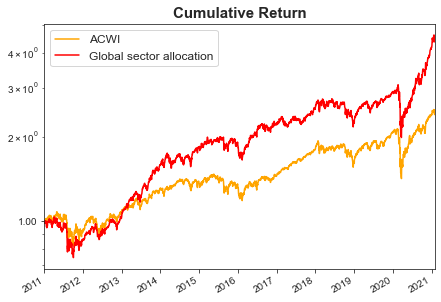

In [45]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'Global sector allocation']
color = ['orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=True);

In [46]:
gsam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
SNS,4.49,2538,15.94,23.19,0.69,-34.99,10.46,22.95,0.47,0.85,35.39,56.67,1.18,79.53
HealthcareService,4.80,2538,16.71,20.81,0.80,-35.23,18.13,15.83,1.06,0.92,16.69,65.83,1.12,94.05
OnlineRetail,10.83,2538,26.46,20.91,1.27,-36.07,19.24,17.16,1.21,0.94,10.62,70.83,1.19,93.54
Water,2.70,2538,10.26,17.93,0.57,-35.72,9.87,13.13,0.62,0.95,18.39,67.50,0.91,92.92
DualMomentum,4.37,2538,15.64,19.43,0.80,-35.14,14.29,15.89,0.90,0.99,17.61,66.67,1.06,89.81


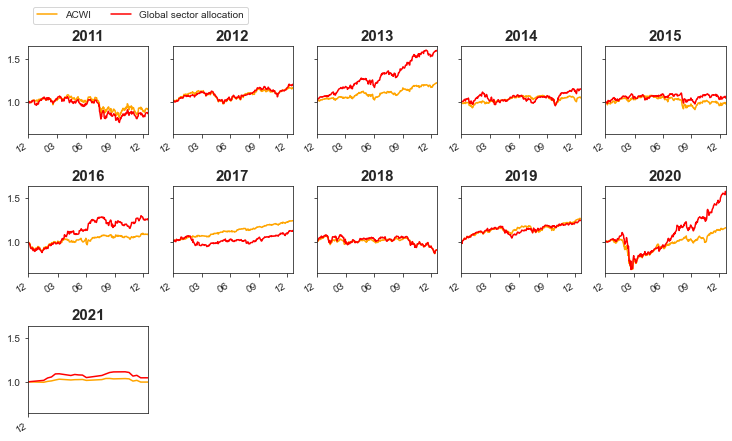

In [10]:
gsam.plot_cum_yearly(strats, names=names, color=color);#, remove=range(2003,2016));

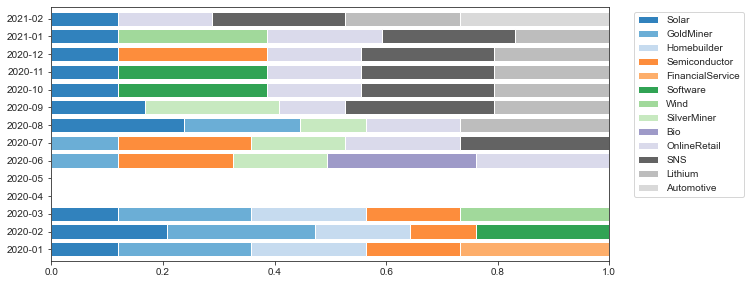

In [13]:
gsam.plot_weight([2020, 2021]);

In [10]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar            0.119299
Semiconductor    0.266760
Lithium          0.206631
SNS              0.238597
OnlineRetail     0.168714
Name: 2020-11-27 00:00:00, dtype: float64

In [45]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar           0.119299
Lithium         0.168714
OnlineRetail    0.206631
Wind            0.266760
SNS             0.238597
Name: 2020-12-30 00:00:00, dtype: float64

In [39]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar           0.119299
Lithium         0.206631
Automotive      0.266760
SNS             0.238597
OnlineRetail    0.168714
Name: 2021-01-29 00:00:00, dtype: float64

In [47]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar            0.074197
Wind             0.181746
Lithium          0.128514
Automotive       0.165910
Semiconductor    0.196308
SNS              0.148395
OnlineRetail     0.104931
Name: 2021-01-29 00:00:00, dtype: float64

# US factor model

In [14]:
ufam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    freq='M',
    assets=setting.assets_test_2, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='US', 
    supporter='US', #'BND_US_Long', 
    cash_equiv='US', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/122 [00:00<?, ?it/s]

2.4894769191741943


<Figure size 432x288 with 0 Axes>

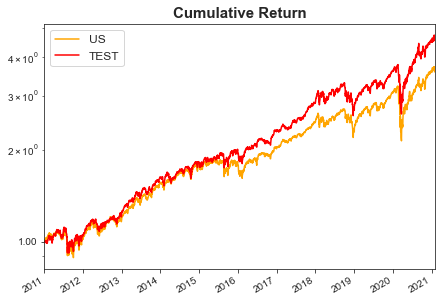

In [15]:
strats = ['US', 'DualMomentum']
names = ['US', 'TEST']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

In [16]:
ufam.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
ACWI,2.40,2538,9.03,17.50,0.52,-33.53,10.31,13.79,0.64,1.00,22.46,65.00,0.94,90.87
Quality,3.67,2538,13.68,16.92,0.81,-34.06,13.90,12.61,1.01,0.92,4.41,67.50,1.11,97.41
Momentum,4.88,2538,16.92,18.27,0.93,-34.08,16.78,14.34,1.18,0.93,3.32,67.50,1.26,97.99
Value,2.68,2538,10.21,17.61,0.58,-37.04,10.52,13.28,0.88,0.95,16.86,66.67,0.92,92.55
US,3.59,2538,13.43,17.12,0.78,-33.72,14.99,12.87,1.08,0.95,6.73,70.83,0.91,97.07
Growth,4.49,2538,15.96,17.64,0.90,-31.35,16.54,13.84,1.09,0.95,4.37,67.50,1.20,97.65
DualMomentum,4.54,2538,16.09,17.76,0.91,-31.02,16.05,14.19,1.09,0.94,3.41,65.00,1.33,98.07


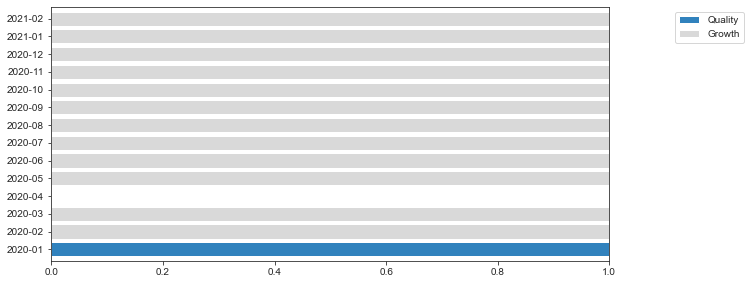

In [18]:
ufam.plot_weight([2020,2021]);

In [19]:
ufam.weight.iloc[-1][ufam.weight.iloc[-1]>0]

Growth    1.0
Name: 2021-01-29 00:00:00, dtype: float64

### Quality 기본 + 낙폭과대

In [20]:
ufam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    freq='M',
    assets=setting.assets_test_6, 
    sig_w_base=[-1,0,0,0,0,0,-1,0,0,0,-1,1], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    #follow_trend_market=(20,60), 
    #follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='US', 
    supporter='Quality', #'BND_US_Long', 
    cash_equiv='Quality', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/122 [00:00<?, ?it/s]

2.8122429847717285


<Figure size 432x288 with 0 Axes>

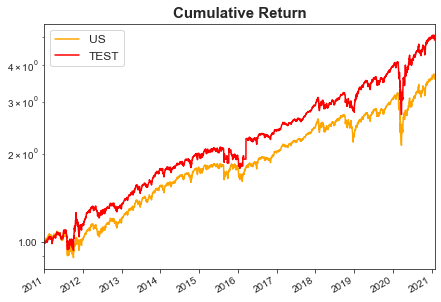

In [21]:
strats = ['US', 'DualMomentum']
names = ['US', 'TEST']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

In [22]:
ufam.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
LowVol,3.02,2538,11.52,15.30,0.75,-36.26,12.88,10.86,1.18,0.75,11.01,65.00,1.26,96.51
Momentum_EM,1.02,2538,0.24,25.79,0.01,-59.02,0.03,21.52,0.00,0.76,49.93,59.17,0.76,-26.61
LowBeta,3.00,2538,11.43,16.08,0.71,-37.13,11.40,11.09,1.06,0.79,9.35,70.83,0.88,91.41
Quality,3.67,2538,13.68,16.92,0.81,-34.06,13.90,12.61,1.01,0.92,4.41,67.50,1.11,97.41
DvdApprec,3.21,2538,12.18,15.94,0.76,-31.72,12.84,11.95,1.06,0.86,6.82,70.00,0.95,97.45
ACWI,2.40,2538,9.03,17.50,0.52,-33.53,10.31,13.79,0.64,1.00,22.46,65.00,0.94,90.87
HighFCF,3.57,2538,13.36,19.39,0.69,-38.63,13.90,15.38,0.94,1.01,21.23,64.17,1.08,87.84
Momentum,4.88,2538,16.92,18.27,0.93,-34.08,16.78,14.34,1.18,0.93,3.32,67.50,1.26,97.99
Growth,4.49,2538,15.96,17.64,0.90,-31.35,16.54,13.84,1.09,0.95,4.37,67.50,1.20,97.65
HighDvd,2.75,2538,10.47,17.08,0.61,-41.59,11.61,11.24,1.02,0.85,15.29,70.83,0.86,88.97


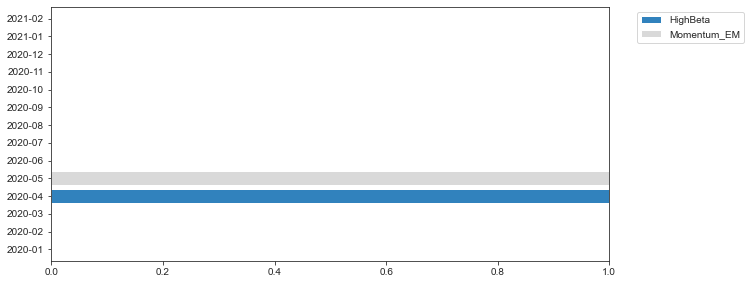

In [23]:
ufam.plot_weight([2020,2021]);

In [24]:
ufam.weight.iloc[-1][ufam.weight.iloc[-1]>0]

Quality    1.0
Name: 2021-01-29 00:00:00, dtype: float64

# US-DM-EM model

In [25]:
udem = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_test_0, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', #'BND_US_Long', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/122 [00:00<?, ?it/s]

2.5036697387695312


<Figure size 432x288 with 0 Axes>

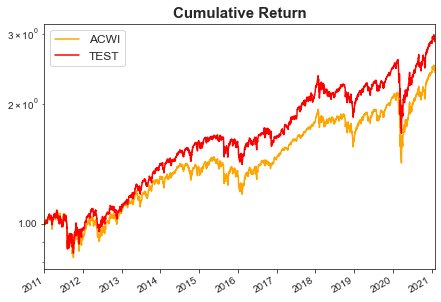

In [26]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'TEST']
color = ['orange', 'r']

udem.plot_cum(strats, names=names, color=color, logy=True);

In [27]:
udem.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
US_Total,3.62,2538,13.52,17.49,0.77,-35.00,14.75,13.24,1.06,0.97,9.22,70.83,0.90,96.45
EM,1.38,2538,3.23,22.14,0.15,-38.20,2.11,19.15,0.11,1.13,44.08,50.83,1.20,-14.48
ACWI,2.40,2538,9.03,17.50,0.52,-33.53,10.31,13.79,0.64,1.00,22.46,65.00,0.94,90.87
Global,1.65,2538,5.07,18.59,0.27,-34.98,4.85,14.19,0.28,1.03,36.87,59.17,0.96,66.45
DualMomentum,2.87,2538,10.96,18.14,0.60,-34.69,11.65,15.06,0.71,0.99,17.69,66.67,0.95,94.12


In [28]:
udem.weight.tail()

,US_Total,EM,ACWI,Global
2020-09-30,1.0,0.0,0.0,0.0
2020-10-30,1.0,0.0,0.0,0.0
2020-11-30,1.0,0.0,0.0,0.0
2020-12-31,1.0,0.0,0.0,0.0
2021-01-29,0.0,1.0,0.0,0.0


# Global country 낙폭과대

In [29]:
usm = q.Backtester(
    setting.base_params(db),
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_global_eq2, 
    sig_w_base=[-1,0,0,0,0,0,-1,0,0,0,0,1], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    #follow_trend_market=(20,60), 
    #follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', #'BND_US_Long', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end
)

  0%|          | 0/122 [00:00<?, ?it/s]

2.6962170600891113


<Figure size 432x288 with 0 Axes>

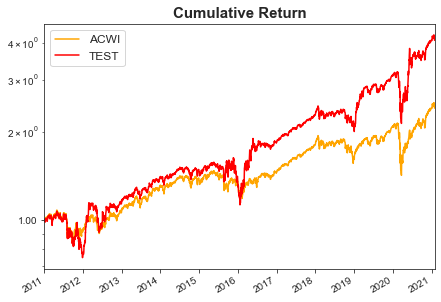

In [30]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'TEST']
color = ['orange', 'r']

usm.plot_cum(strats, names=names, color=color, logy=True);

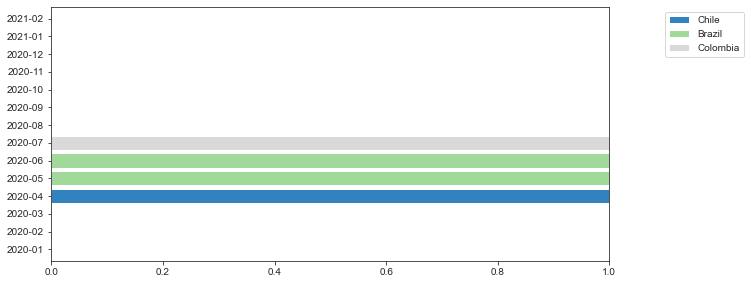

In [31]:
usm.plot_weight([2020,2021]);

In [32]:
usm.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Chile,0.45,2538,-7.58,23.86,-0.32,-74.08,-10.97,19.82,-0.52,0.94,70.55,41.67,1.23,28.91
US_Nasdaq,6.39,2538,20.05,19.63,1.02,-28.56,20.21,16.53,1.22,1.00,4.59,65.00,1.38,97.39
Canada,1.23,2538,2.04,19.47,0.10,-42.66,3.25,14.52,0.19,0.95,37.75,53.33,1.05,0.71
Belgium,1.97,2538,6.92,20.13,0.34,-42.80,5.98,16.15,0.39,0.97,31.50,59.17,1.00,75.65
Vietnam,0.78,2538,-2.45,24.96,-0.10,-60.43,-2.23,23.18,-0.10,0.83,54.26,48.33,1.09,-87.85
Africa,0.78,2538,-2.42,20.67,-0.12,-59.35,-0.64,17.56,-0.03,0.85,51.20,50.00,1.00,27.48
Korea,1.68,2538,5.23,24.46,0.21,-48.93,1.11,20.28,0.05,1.13,47.44,60.00,0.88,19.26
India,1.24,2538,2.16,24.80,0.09,-45.07,3.27,21.60,0.14,0.89,41.15,52.50,1.08,-42.70
Austria,1.19,2538,1.72,24.36,0.07,-58.10,1.03,18.76,0.05,1.14,48.67,53.33,1.04,-16.08
Turkey,0.51,2538,-6.45,33.07,-0.19,-72.34,-7.23,32.18,-0.22,1.07,62.04,50.00,0.98,68.38
